In [1]:
import numpy as np
import skimage.io
import skimage.filters
import skimage.color
import matplotlib.pyplot as plt

# 1. Laden und Weichzeichnen des Bildes
image = skimage.io.imread("lake.png")
image_smoothed = skimage.filters.gaussian(image, sigma=2, multichannel=True)


/var/folders/ts/4_j3m5qs2wvgc9jjm_yb5p1h0000gn/T/ipykernel_11842/2337277410.py:9: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_smoothed = skimage.filters.gaussian(image, sigma=2, multichannel=True)


In [2]:
# 1.1 Umwandlung in Grauwertbild
image_gray = skimage.color.rgb2gray(image_smoothed)



In [3]:

# 1.2 Ermittlung der Gradientenstärke mit Sobel-Operatoren
gradient = skimage.filters.sobel(image_gray)



In [4]:
# 1. Laden und Weichzeichnen des Bildes
image = skimage.io.imread("lake.png")
image_smoothed = skimage.filters.gaussian(image, sigma=2, multichannel=True)

/var/folders/ts/4_j3m5qs2wvgc9jjm_yb5p1h0000gn/T/ipykernel_11842/2318990242.py:3: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_smoothed = skimage.filters.gaussian(image, sigma=2, multichannel=True)


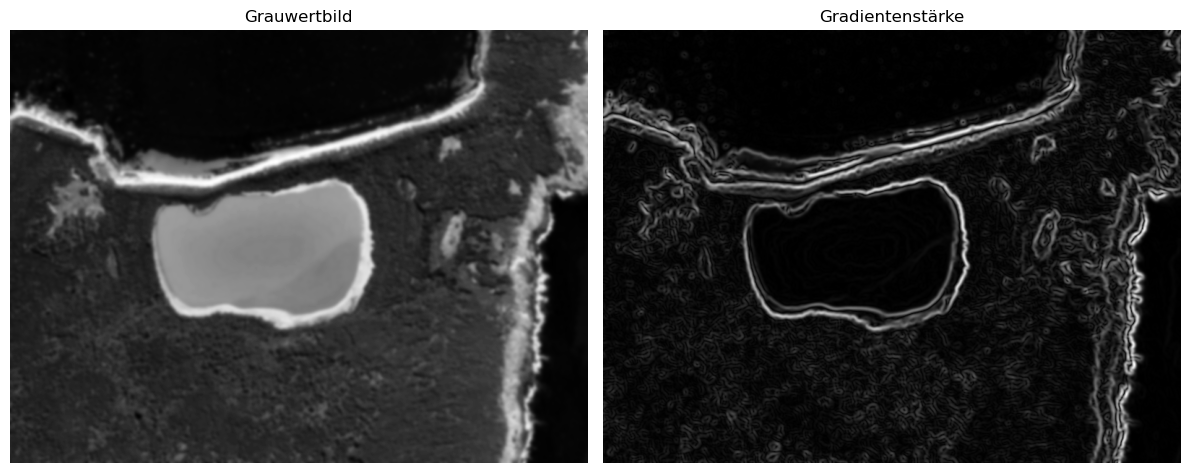

In [5]:
# Visualisierung der Ergebnisse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Grauwertbild")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient, cmap='gray')
plt.title("Gradientenstärke")
plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# 2. Umwandlung in anderen Farbraum (Rotheit)
def transform_function(rgb):
    r, g, b = rgb
    # Beispielhafte Transformation: Farbwert minus Blau
    rotheit = r - b
    return rotheit

In [7]:

# Anwenden der Transformationsfunktion auf jedes Pixel
image_rotheit = np.apply_along_axis(transform_function, axis=-1, arr=image_smoothed)

# Strecken des Kontrasts im neuen Farbraum
image_rotheit_contrast_stretched = skimage.exposure.rescale_intensity(image_rotheit, in_range=(np.min(image_rotheit), np.max(image_rotheit)), out_range=(0, 255))

# 3. Ermittlung der Gradientenstärke im neuen Farbraum
gradient_rotheit = skimage.filters.sobel(image_rotheit_contrast_stretched)



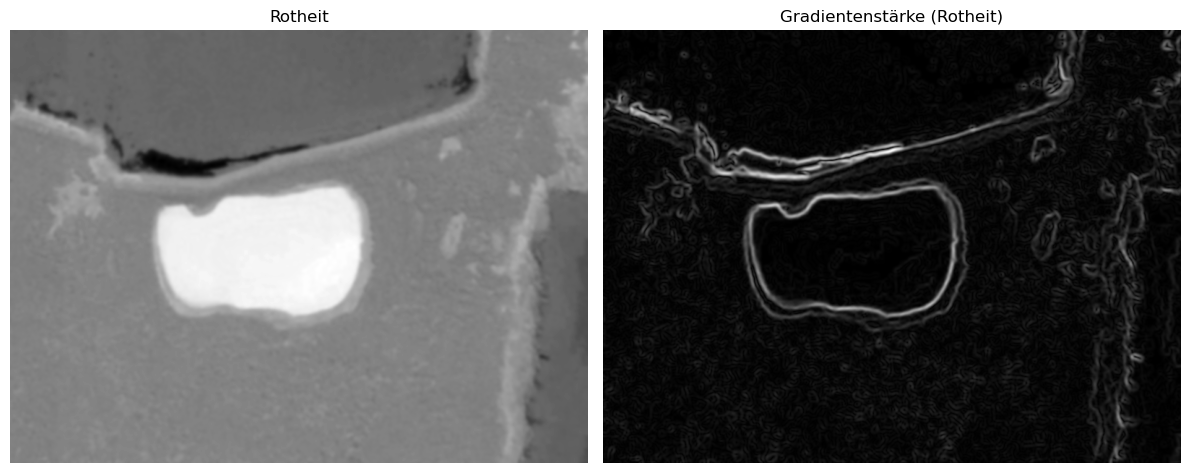

In [8]:

# Visualisierung der Ergebnisse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rotheit_contrast_stretched, cmap='gray')
plt.title("Rotheit")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_rotheit, cmap='gray')
plt.title("Gradientenstärke (Rotheit)")
plt.axis('off')

plt.tight_layout()
plt.show()